# Data Project - Stock Market Analysis of (Apple, Amazon, Google, and Microsoft)


In this notebook, we'll use yfinance to get stock data for Apple, Amazon, Google, and Microsoft. We'll visualize this data with Seaborn and Matplotlib, analyze stock risk from past performance, and predict future prices using LSTM

# Let's install yfinance library

In [1]:
!pip install -q yfinance

**Import important Libraries to explore data**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use("ggplot")
%matplotlib inline

import yfinance as yf

# For time stamps
from datetime import datetime

**Define the tech stocks and their company names:**

In [3]:
tech_stocks = {
    'AAPL': 'APPLE',
    'GOOG': 'GOOGLE',
    'MSFT': 'MICROSOFT',
    'AMZN': 'AMAZON'
}

**Set up end and start times for data retrieval:**

In [4]:
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)
print(f"Current date: {end}")
print(f"Start date: {start}")


Current date: 2024-07-27 11:05:25.567016
Start date: 2022-07-27 00:00:00


**Initialize an empty list to store the dataframes:**

In [5]:
dataframes = []

**Download stock data**

In [6]:
for comp, name in tech_stocks.items():
    # Download the stock data
    data = yf.download(comp, start=start, end=end)
    # Add a column for the company name
    data['company_name'] = name
    # Append the dataframe to the list
    dataframes.append(data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
dataframes[:4]

[                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-07-27  152.580002  157.330002  152.160004  156.789993  155.035965   
 2022-07-28  156.979996  157.639999  154.410004  157.350006  155.589722   
 2022-07-29  161.240005  163.630005  159.500000  162.509995  160.691971   
 2022-08-01  161.009995  163.589996  160.889999  161.509995  159.703171   
 2022-08-02  160.100006  162.410004  159.630005  160.009995  158.219925   
 ...                ...         ...         ...         ...         ...   
 2024-07-22  227.009995  227.779999  223.089996  223.960007  223.960007   
 2024-07-23  224.369995  226.940002  222.679993  225.009995  225.009995   
 2024-07-24  224.000000  224.800003  217.130005  218.539993  218.539993   
 2024-07-25  218.929993  220.850006  214.619995  217.490005  217.490005   
 2024-07-26  218.699997  219.490005  216.009995  217.960007  217.960007   
 
                Volume 

In [8]:
df = pd.concat(dataframes)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-27,152.580002,157.330002,152.160004,156.789993,155.035965,78620700,APPLE
2022-07-28,156.979996,157.639999,154.410004,157.350006,155.589722,81378700,APPLE
2022-07-29,161.240005,163.630005,159.500000,162.509995,160.691971,101786900,APPLE
2022-08-01,161.009995,163.589996,160.889999,161.509995,159.703171,67829400,APPLE
2022-08-02,160.100006,162.410004,159.630005,160.009995,158.219925,59907000,APPLE


In [9]:
# Get the count of each company in the dataset
company_counts = df['company_name'].value_counts()

# Display the number of companies and their respective counts
print(f"Number of companies in the dataset: {len(company_counts)}")
print("Count of appearances for each company:")
print(company_counts)


Number of companies in the dataset: 4
Count of appearances for each company:
company_name
APPLE        503
GOOGLE       503
MICROSOFT    503
AMAZON       503
Name: count, dtype: int64


In [10]:
df.shape

(2012, 7)

In [11]:
df.size

14084

## Explore the Stats


In [12]:
# Display statistical summary of the dataset
stats = df.describe()

# Display the statistical summary
print("Statistical summary of the dataset:")
print(stats)


Statistical summary of the dataset:
              Open         High          Low        Close    Adj Close  \
count  2012.000000  2012.000000  2012.000000  2012.000000  2012.000000   
mean    191.194262   193.194644   189.297636   191.325271   190.552430   
std      91.800129    92.368774    91.120401    91.814650    91.291578   
min      82.800003    83.480003    81.430000    81.820000    81.820000   
25%     129.652500   131.257496   128.127502   129.474998   129.167496   
50%     166.635002   168.675003   165.604996   167.059998   166.079048   
75%     227.117496   229.144997   223.450001   226.442497   224.335495   
max     467.000000   468.350006   464.459991   467.559998   467.559998   

             Volume  
count  2.012000e+03  
mean   4.301243e+07  
std    2.623188e+07  
min    7.409100e+06  
25%    2.237712e+07  
50%    3.747750e+07  
75%    5.611705e+07  
max    2.464214e+08  


We have only 14084 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [13]:
# Display summary information about the dataset
print("\nSummary information of the dataset:")
print(df.info())


Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2022-07-27 to 2024-07-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2012 non-null   float64
 1   High          2012 non-null   float64
 2   Low           2012 non-null   float64
 3   Close         2012 non-null   float64
 4   Adj Close     2012 non-null   float64
 5   Volume        2012 non-null   int64  
 6   company_name  2012 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 125.8+ KB
None


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day.

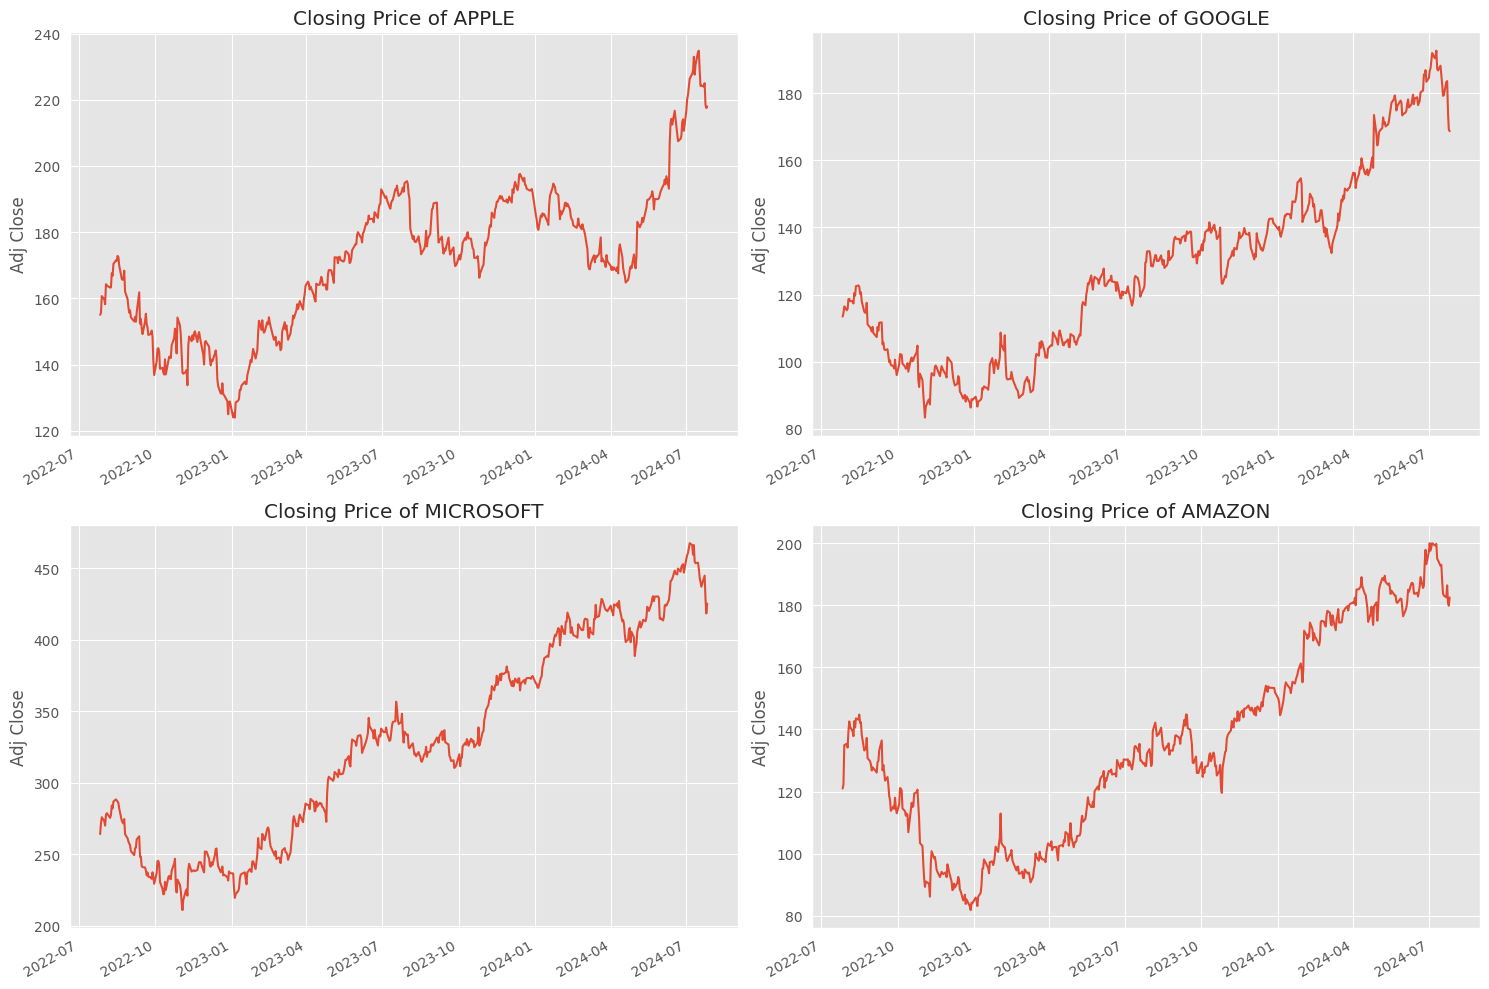

In [14]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Iterate over the dataframes and plot the adjusted closing prices
for i, (comp, name) in enumerate(tech_stocks.items(), 1):
    plt.subplot(2, 2, i)
    dataframes[i - 1]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name}")

plt.tight_layout()
plt.show()


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.

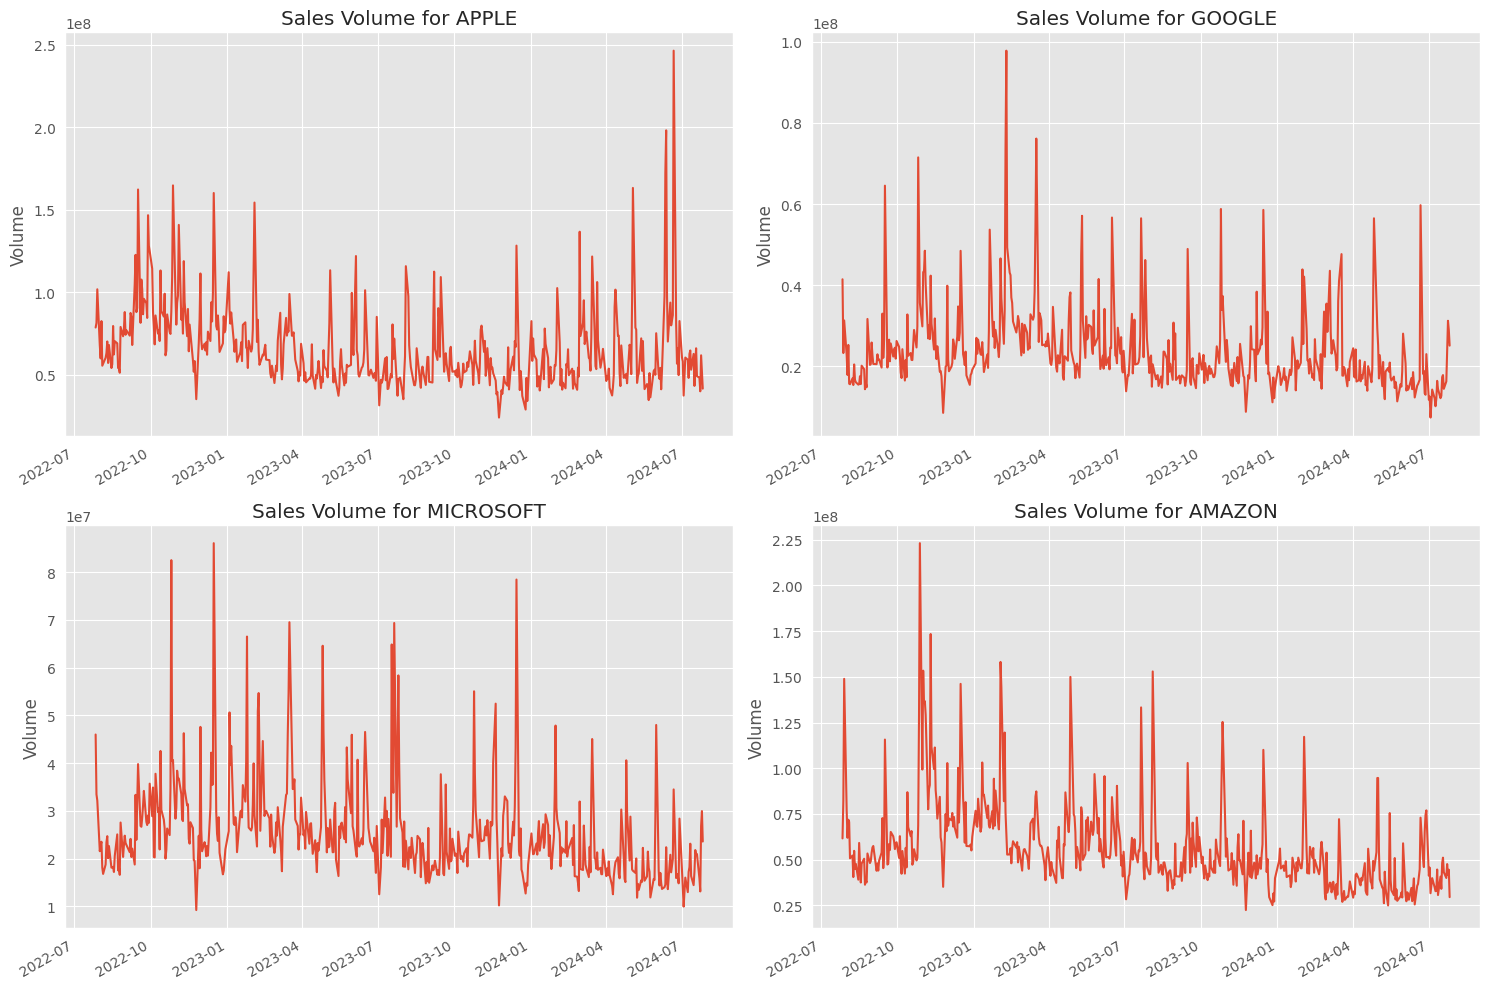

In [15]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Iterate over the dataframes and plot the adjusted closing prices
for i, (comp, name) in enumerate(tech_stocks.items(), 1):
    plt.subplot(2, 2, i)
    dataframes[i - 1]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name}")

plt.tight_layout()
plt.show()

# Daily Returns

In [16]:
# Calculate the daily returns for each company
for df in dataframes:
    df['Daily Return'] = df['Adj Close'].pct_change()

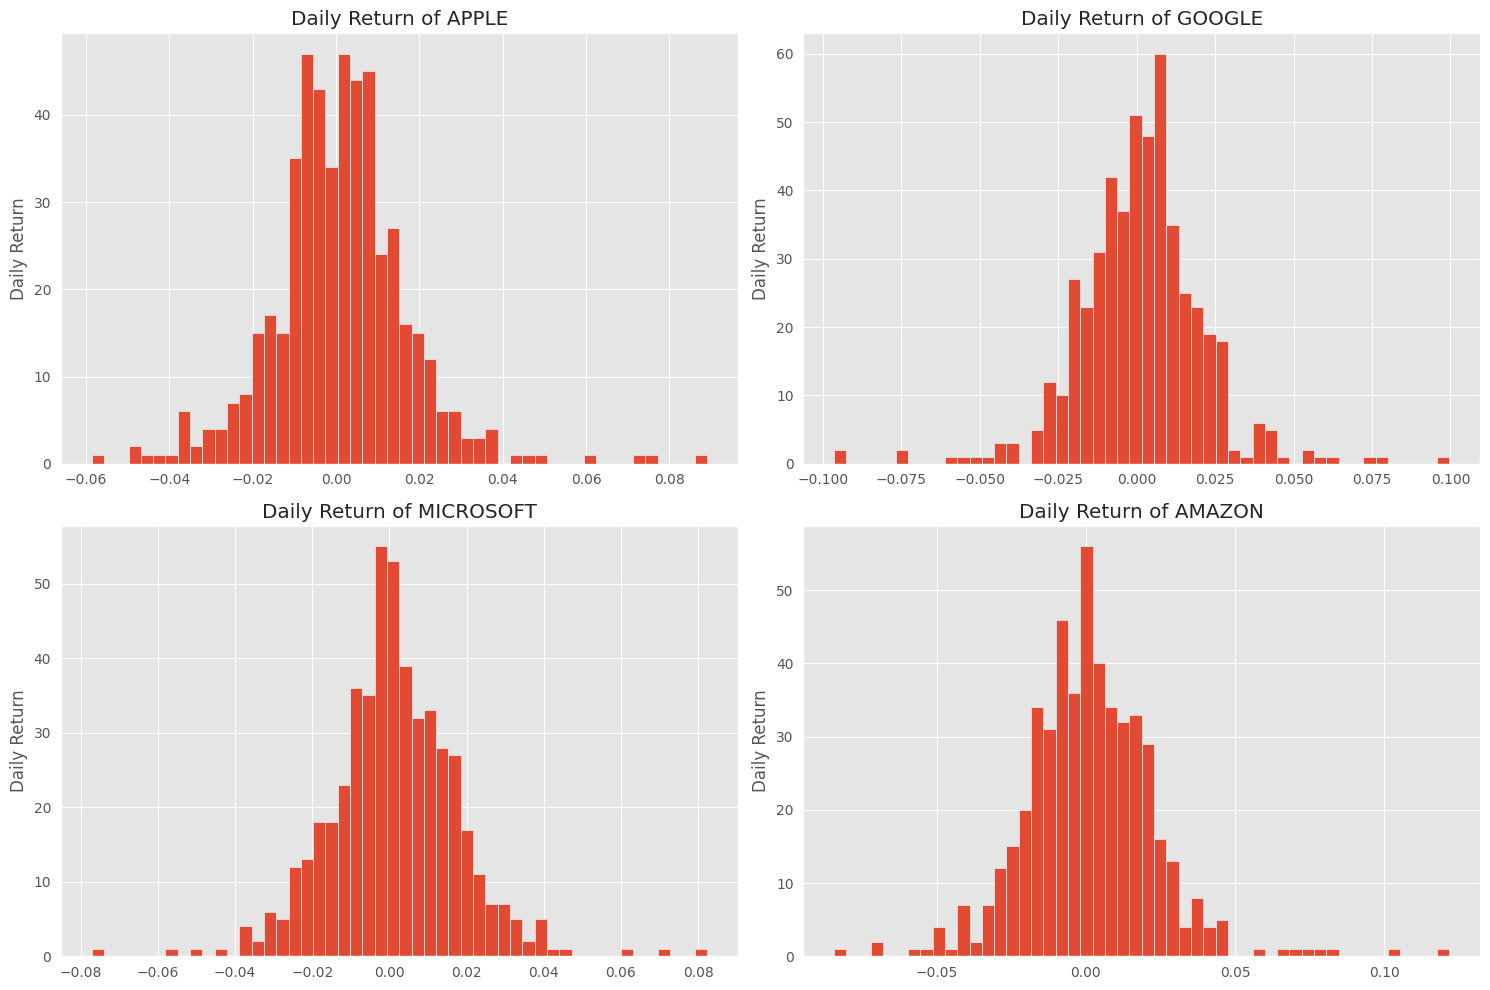

In [17]:
# Plot the histograms of the daily returns
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (df, (comp, name)) in enumerate(zip(dataframes, tech_stocks.items()), 1):
    plt.subplot(2, 2, i)
    df['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.xlabel(None)
    plt.title(f"Daily Return of {name}")

plt.tight_layout()
plt.show()

# correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0.

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(list(tech_stocks.keys()), start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

# Display the first few rows of the tech returns DataFrame
print(tech_rets.head())



[*********************100%%**********************]  4 of 4 completed

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2022-07-27       NaN       NaN       NaN       NaN
2022-07-28  0.003572  0.010829  0.008715  0.028541
2022-07-29  0.032793  0.103615  0.017890  0.015665
2022-08-01 -0.006153  0.003260 -0.009945 -0.009724
2022-08-02 -0.009287 -0.009085  0.003637 -0.011474


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


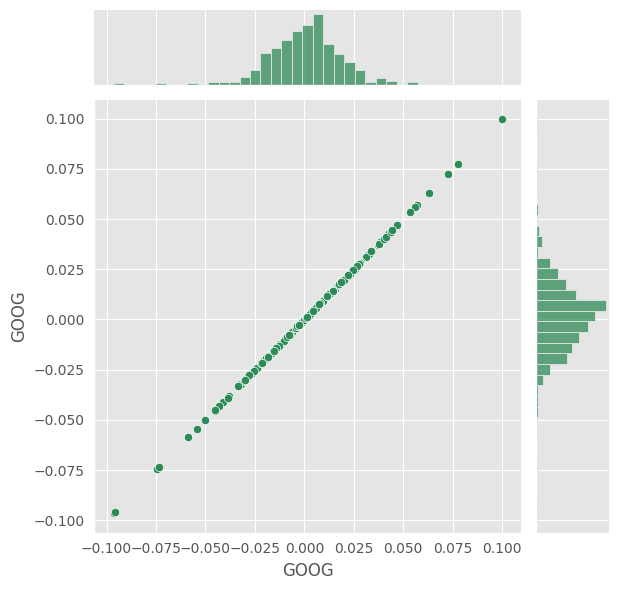

In [19]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


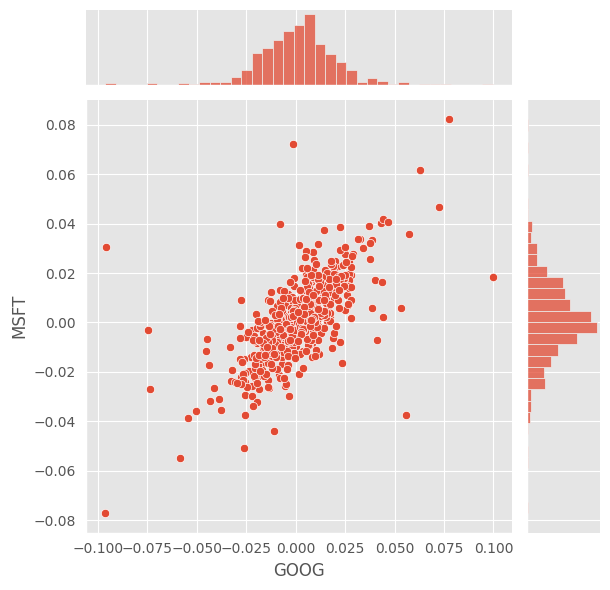

In [20]:
# We'll use jointplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')
# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


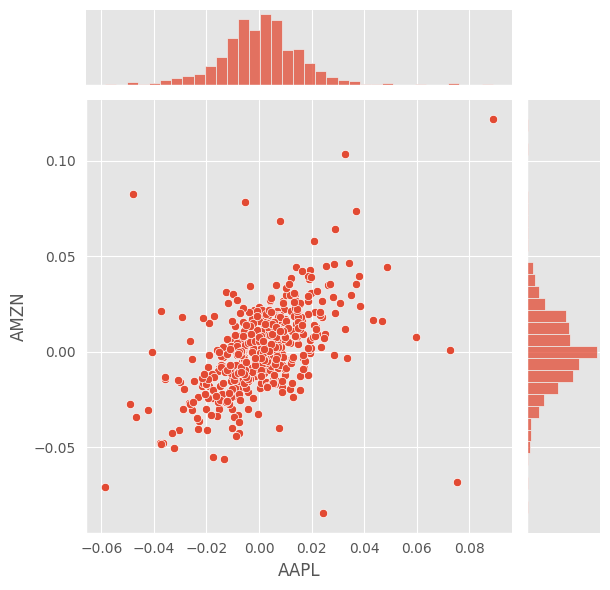

In [21]:
# We can also compare other stocks in a similar manner
# For example, comparing Apple and Amazon
sns.jointplot(x='AAPL', y='AMZN', data=tech_rets, kind='scatter')
# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


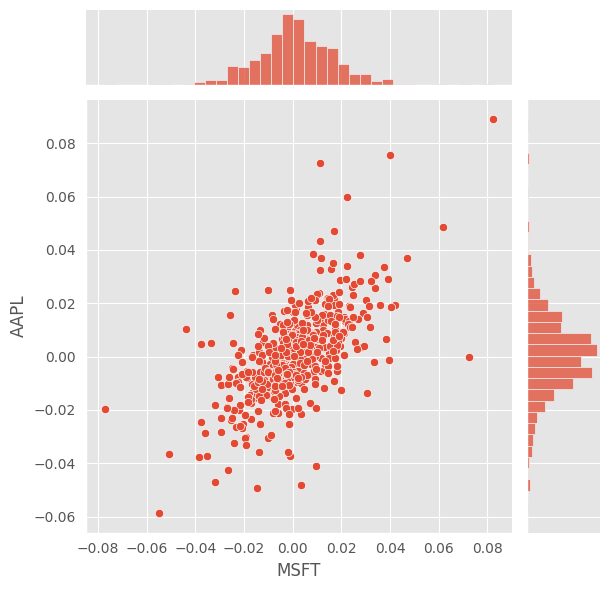

In [22]:
# Comparing Microsoft and Apple
sns.jointplot(x='MSFT', y='AAPL', data=tech_rets, kind='scatter')
# Show the plots
plt.show()


Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

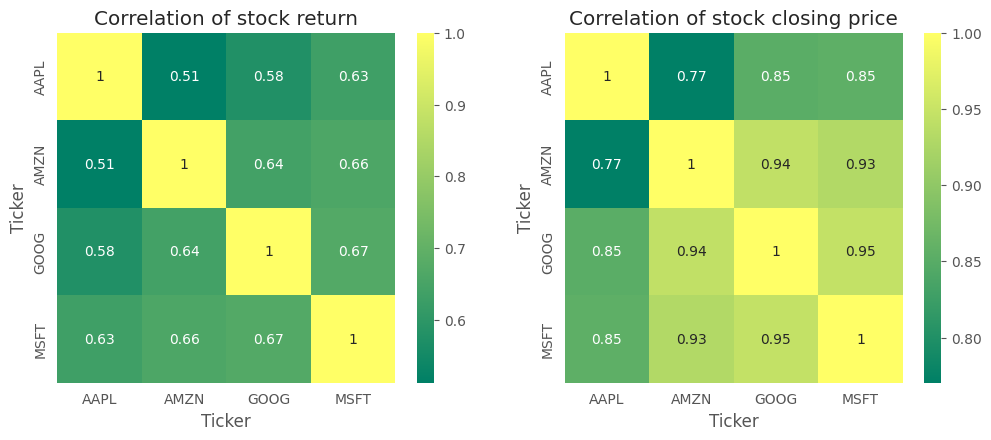

In [23]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Feature Engieering:

In [24]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,Daily Return
Date,,,,,,,,
2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000,AMAZON,NaN
2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500,AMAZON,0.010829
2022-07-29,134.899994,137.649994,132.410004,134.949997,134.949997,148892900,AMAZON,0.103615
2022-08-01,134.960007,138.830002,133.509995,135.389999,135.389999,76846900,AMAZON,0.003260
2022-08-02,134.720001,137.440002,134.089996,134.160004,134.160004,61922400,AMAZON,-0.009085


In [25]:
def create_features(df, lag=5):
    if 'Adj Close' in df.columns:
        for i in range(1, lag+1):
            df[f'Lag_{i}'] = df['Adj Close'].shift(i)
        return df
    else:
        print("Column 'Adj Close' not found in the DataFrame.")
        return None

data = create_features(df, lag=5)
if data is not None:
    data.dropna(inplace=True)


In [26]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,Daily Return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,,
2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800,AMAZON,0.039952,134.160004,135.389999,134.949997,122.279999,120.970001
2022-08-04,140.580002,143.559998,139.550003,142.570007,142.570007,70585000,AMAZON,0.021861,139.520004,134.160004,135.389999,134.949997,122.279999
2022-08-05,140.100006,142.860001,139.600006,140.800003,140.800003,50686900,AMAZON,-0.012415,142.570007,139.520004,134.160004,135.389999,134.949997
2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000,AMAZON,-0.009872,140.800003,142.570007,139.520004,134.160004,135.389999
2022-08-09,138.050003,138.949997,136.210007,137.830002,137.830002,40434700,AMAZON,-0.011333,139.410004,140.800003,142.570007,139.520004,134.160004


In [27]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800,0.039952,134.160004,135.389999,134.949997,122.279999,120.970001
2022-08-04,140.580002,143.559998,139.550003,142.570007,142.570007,70585000,0.021861,139.520004,134.160004,135.389999,134.949997,122.279999
2022-08-05,140.100006,142.860001,139.600006,140.800003,140.800003,50686900,-0.012415,142.570007,139.520004,134.160004,135.389999,134.949997
2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000,-0.009872,140.800003,142.570007,139.520004,134.160004,135.389999
2022-08-09,138.050003,138.949997,136.210007,137.830002,137.830002,40434700,-0.011333,139.410004,140.800003,142.570007,139.520004,134.160004


In [28]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Adj Close'])
y = data['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [30]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.4913991572402996e-19


In [31]:
# Predicting the next day's closing price
latest_data = data.tail(1).drop(columns=['Adj Close'])
predicted_price = lr.predict(latest_data)
print(f'Predicted closing price: {predicted_price[0]}')

Predicted closing price: 182.49999999937012


In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
lstm = Sequential()
lstm.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
lstm.add(LSTM(64, return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))

# Compile the model
lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm.fit(X_train, y_train, batch_size=32, epochs=10)

2024-07-27 11:05:46.005116: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 11:05:46.005283: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 11:05:46.210127: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 18854.1367
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17354.4941
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14803.6221
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13101.4453
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11071.3447
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9055.3125
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7724.6646
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6224.2778
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4857.1602
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3759.1873


In [33]:
y_pred = lstm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
Mean Squared Error: 3221.5579552657787


In [34]:
# Predicting the next day's closing price
latest_data = data.tail(1).drop(columns=['Adj Close'])
predicted_price = lstm.predict(latest_data)
print(f'Predicted closing price: {predicted_price[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted closing price: [91.4342]
